<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
from google.colab import files

uploaded = files.upload()




Saving oppenheimer_reviews.csv to oppenheimer_reviews.csv


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the dataset
data = pd.read_csv("oppenheimer_reviews.csv")

# Text representation
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(data['Clean Text'])

# LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# Top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

print("\nFeatures (text representation) used for topic modeling:")
print(vectorizer.get_feature_names_out())

print("\nTop 10 clusters for topic modeling:")
print_top_words(lda, vectorizer.get_feature_names_out(), 10)



Features (text representation) used for topic modeling:
['000' '10' '100' ... 'years' 'yes' 'young']

Top 10 clusters for topic modeling:
Topic #1:
film feel like need oppenheimer year feeling format hours amazing

Topic #2:
movie story film nolan good oppenheimer just maybe better characters

Topic #3:
great really oppenheimer performance best time ll film oscar brilliant

Topic #4:
movie long film like nolan watched recent time person non

Topic #5:
watch imax great film christopher best long nolan book don

Topic #6:
oppenheimer time movie film bomb political hollywood story sound feel

Topic #7:
film nolan just murphy sound didn loud music time need

Topic #8:
oppenheimer movie like years robert nolan performances movies planet think

Topic #9:
oppenheimer nolan man robert film best role way downey murphy

Topic #10:
oppenheimer nolan movie really scene just story bomb film time



# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

The primary feature that is used for sentiment classification is Clean text which is mainly used for reviews.

TF-IDF is mainly used for converting raw text data into numerical features.

For Logistic regression performance and support vector machine performance the results are same.

In [ ]:
from google.colab import files

uploaded = files.upload()





Saving oppenheimer_reviews.csv to oppenheimer_reviews (1).csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv("oppenheimer_reviews.csv")

# Convert 'sentiment' column to string type if it's not already
data['Sentiment'] = data['Sentiment'].astype(str)

# Handling missing values by replacing them with an empty string
data['Clean Text'] = data['Clean Text'].fillna('')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Clean Text'], data['Sentiment'], test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize classifiers
lr_classifier = LogisticRegression(max_iter=1000)
svm_classifier = SVC()

# Perform cross-validation for Logistic Regression
lr_scores = cross_val_score(lr_classifier, X_train_tfidf, y_train, cv=5)

# Perform cross-validation for Support Vector Machine
svm_scores = cross_val_score(svm_classifier, X_train_tfidf, y_train, cv=5)

# Train classifiers
lr_classifier.fit(X_train_tfidf, y_train)
svm_classifier.fit(X_train_tfidf, y_train)

# Predictions
lr_preds = lr_classifier.predict(X_test_tfidf)
svm_preds = svm_classifier.predict(X_test_tfidf)

# Calculate evaluation metrics
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_precision = precision_score(y_test, lr_preds, average='weighted')
lr_recall = recall_score(y_test, lr_preds, average='weighted')
lr_f1 = f1_score(y_test, lr_preds, average='weighted')

svm_accuracy = accuracy_score(y_test, svm_preds)
svm_precision = precision_score(y_test, svm_preds, average='weighted')
svm_recall = recall_score(y_test, svm_preds, average='weighted')
svm_f1 = f1_score(y_test, svm_preds, average='weighted')

# Print results
print("Logistic Regression Performance:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)

print("\nSupport Vector Machine Performance:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Logistic Regression Performance:
Accuracy: 0.245
Precision: 0.22941168441168439
Recall: 0.245
F1 Score: 0.22849717959524654

Support Vector Machine Performance:
Accuracy: 0.245
Precision: 0.22941168441168439
Recall: 0.245
F1 Score: 0.22849717959524654


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

We have selected this features 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt' because have beautiful and meaningful insights and that can be well explained for EDA Results.



In [ ]:
from google.colab import files

uploaded = files.upload()



Saving data_description.txt to data_description.txt


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving train.csv to train.csv


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

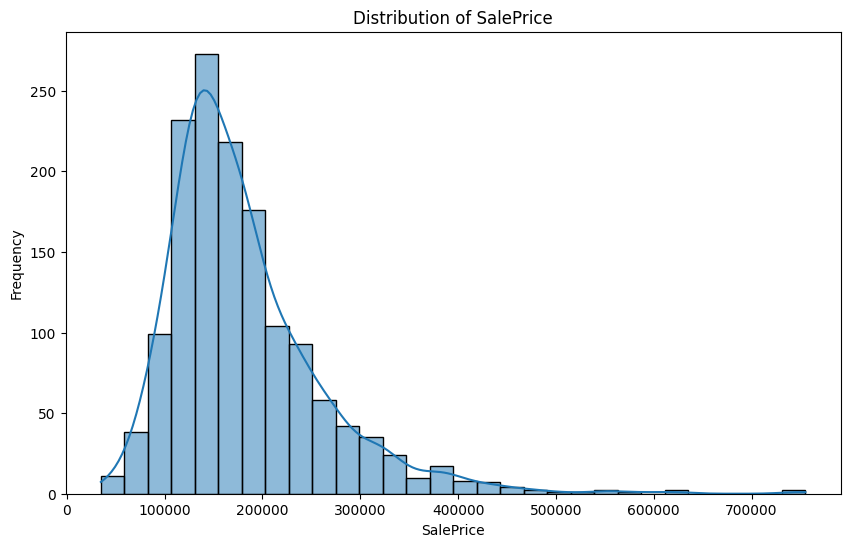

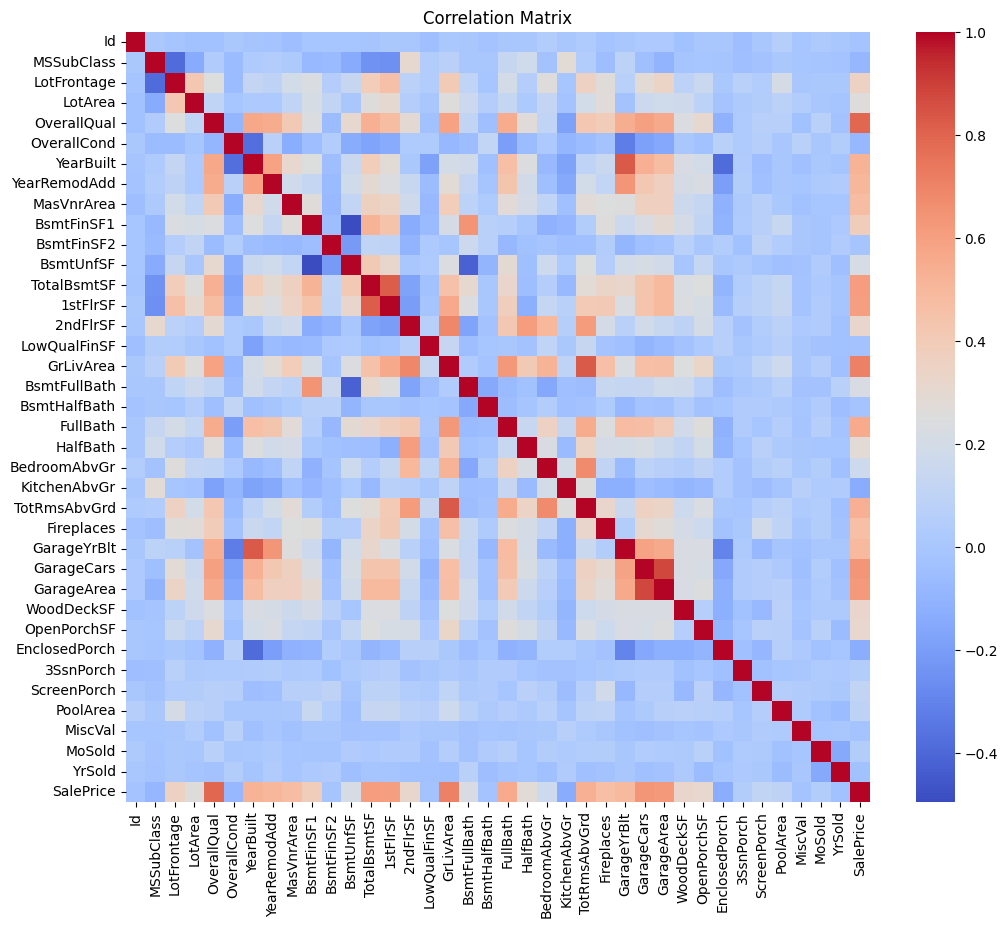

(1460, 62)
Mean Squared Error: 1568368656.5500445
Root Mean Squared Error: 39602.63446476818
R-squared: 0.7955277762397541


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the Dataset
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Step 2: Exploratory Data Analysis (EDA)
# Display the first few rows of the dataset
print(train_data.head())

# Check the shape of the dataset
print(train_data.shape)

# Check for missing values
print(train_data.isnull().sum())

# Visualize the distribution of the target variable (house price)
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], bins=30, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Visualize correlation matrix
corr_matrix = train_data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Step 3: Data Cleaning (Handle missing values, outliers, etc.)
# For simplicity, let's drop columns with missing values
train_data_clean = train_data.dropna(axis=1)
print(train_data_clean.shape)

# Step 4: Feature Selection
# Based on correlation matrix and domain knowledge, select features
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt']

# Step 5: Split Data for Training and Testing
X = train_data_clean[selected_features]
y = train_data_clean['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Develop Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Evaluate Model Performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving oppenheimer_reviews.csv to oppenheimer_reviews.csv


In [12]:
from transformers import pipeline
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv("oppenheimer_reviews.csv")

# Load BERT model for sentiment analysis
sentiment_analysis = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Define a function to split text into smaller chunks
def split_text(text, max_chunk_size=500):
    chunks = []
    for i in range(0, len(text), max_chunk_size):
        chunks.append(text[i:i + max_chunk_size])
    return chunks

# Perform sentiment analysis on the text data
predicted_labels = []
for text in data['Clean Text']:
    text_chunks = split_text(text)
    chunk_results = [sentiment_analysis(chunk) for chunk in text_chunks]
    predicted_label = max(chunk_results, key=lambda x: x[0]['score'])[0]['label']
    predicted_labels.append(predicted_label)

# Convert ground truths to string type for consistency
ground_truths = data['Sentiment'].astype(str)

# Evaluate performance using accuracy, precision, recall, and F1 score
accuracy = accuracy_score(ground_truths, predicted_labels)
precision = precision_score(ground_truths, predicted_labels, average='weighted')
recall = recall_score(ground_truths, predicted_labels, average='weighted')
f1 = f1_score(ground_truths, predicted_labels, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)







Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We have selected the BERT Model which is termed for Bidirectional Encoder Representations from Transformers . This variant can process text in different languages respectively. It can get the text data from various resources namely wikipedia etc.

No specific fine tuning is applied and you can check the results of Accuracy , precision , recall and F1 metrics.

BERT Model has its own advantages and disadvantages

Advantages :
1. It can handle tasks from various languages making it language Independent.
2. It can perform sentiment analysis without any task specific fine tuning.

Disadvatages:

1. It involves large set of parameters and it will be difficult for large data sets.
2. Sometimes BERT Models can affect the accuracy of the sentiment analysis and may additionally require splitting into smaller chunks and this is a difficult task.